# Goal
Using the data collected from existing customers, build a model that will help the marketing team identify potential customers <h4 style="color:Tomato;"> who are relatively more likely to subscribe term deposit and thus increase their hit ratio.</h3>

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

import bokeh.plotting.figure as bk_figure
from bokeh.plotting import show
from bokeh.io import output_notebook

In [2]:
bank_data = pd.read_csv("bank-full.csv") # read a cvs file that contains the dataset for a bank

In [3]:
bank_data.shape # understand number of rows and columns for the data set

(45211, 17)

Bank client data:
1. age: Continuous feature
2. job: Type of job (management, technician, entrepreneur, blue-collar, etc.)
3. marital: marital status (married, single, divorced)
4. education: education level (primary, secondary, tertiary)
5. default: has credit in default?
6. housing: has housing loan?
7. loan: has personal loan?
8. balance in account <br><br>

Related to previous contact:
9. contact: contact communication type
10. month: last contact month of year
11. day: last contact day of the month
12. duration: last contact duration, in seconds* <br><br>

Other attributes:
13. campaign: number of contacts performed during this campaign and for this client 
14. pdays: number of days that passed by after the client was last contacted from a previous campaign (-1 tells us the person has not been contacted or contact period is beyond 900 days)
15. previous: number of contacts performed before this campaign and for this client
16. poutcome: outcome of the previous marketing campaign <br><br>

Output variable (desired target):
17. Target: Tell us has the client subscribed a term deposit. (Yes, No)

According to the course objective, the output variable is (desired target):
Target: Tell us has the client subscribed a term deposit. (Yes, No)

<h2 style="color:Red;"> Classification Objective - "Target" is identified as the dependent variable because it contains the term deposit status of the customers. Our objective is "to build a model that is going to help the marketing team identify potential customers who are relatively more likely to subscribe term deposit. <h4> <br>
Technically, we want to built a model with the best precision number because it is based on true positives divided by the number of true positives plus the number of false positives. In other word, the model with the best precision number has the best hit ratio.
<br><br>

# 1. Univariate analysis (12 marks)

## 1.1. Univariate analysis
Data types and description of the independent attributes which should include (name, meaning, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions / tails, missing values, outliers.

### 1.1.1 Name and meaning

In [4]:
bank_data.info() # Take a look at variable names, total rows, and type of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank_data.head(10) # Have a peek at the type of value for the variables

age           job   marital  education default  balance housing loan  \
0   58    management   married   tertiary      no     2143     yes   no   
1   44    technician    single  secondary      no       29     yes   no   
2   33  entrepreneur   married  secondary      no        2     yes  yes   
3   47   blue-collar   married    unknown      no     1506     yes   no   
4   33       unknown    single    unknown      no        1      no   no   
5   35    management   married   tertiary      no      231     yes   no   
6   28    management    single   tertiary      no      447     yes  yes   
7   42  entrepreneur  divorced   tertiary     yes        2     yes   no   
8   58       retired   married    primary      no      121     yes   no   
9   43    technician    single  secondary      no      593     yes   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  
5  unknown    5   may       139         1     -1         0  unknown     no  
6  unknown    5   may       217         1     -1         0  unknown     no  
7  unknown    5   may       380         1     -1         0  unknown     no  
8  unknown    5   may        50         1     -1         0  unknown     no  
9  unknown    5   may        55         1     -1         0  unknown     no

<h3 style="color:Tomato;"> We have decided to break the variables into continuous and categorical variables. We are going to study the characteristics of the continuous variables.</h3>

### 1.1.2 Range of values observed for continuous variables

We are classifying independent variables to categorical and continuous variables. The characteristics of the continuous variables are analyzed for range of values observed, central values (mean and median), standard deviation and quartiles.

The name of continuous variables are = ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]

In [6]:
bank_data.describe() # Statistic values of continuous variables

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [7]:
# This function is used to detect outliers in the dataset using standard of deviation
def detect_outliers(df, col): # There are a few methods to detect outliers (Z-sore, interquartile, or standard of deviation)
    upper_outliers = df[col].mean() + 3 * df[col].std()
    lower_outliers = df[col].mean() - 3 * df[col].std()
    upper_outliers = df[df[col] > upper_outliers] # Standard of deviation is used to detect outliers
    lower_outliers = df[df[col] < lower_outliers]
    total_outliers = upper_outliers[col].count() + upper_outliers[col].count()
    
    return f"Number of outliers = {total_outliers}"

for feature in bank_data.columns: # Get all the column names of a data frame
    if bank_data[feature].dtype == 'int64': # Look for integer data series
        outlier_info = detect_outliers(bank_data, feature) # Generate information for outliers
        print(f"median of {feature} = {np.median(bank_data[feature])}, and mean of {feature} = {round(np.mean(bank_data[feature]), 2)}, {outlier_info}")

median of age = 39.0, and mean of age = 40.94, Number of outliers = 762
median of balance = 448.0, and mean of balance = 1362.27, Number of outliers = 1488
median of day = 16.0, and mean of day = 15.81, Number of outliers = 0
median of duration = 180.0, and mean of duration = 258.16, Number of outliers = 1926
median of campaign = 2.0, and mean of campaign = 2.76, Number of outliers = 1680
median of pdays = -1.0, and mean of pdays = 40.2, Number of outliers = 3446
median of previous = 0.0, and mean of previous = 0.58, Number of outliers = 1164


<h3 style="color:Tomato;"> We found that indepedent variables pdays, duration and campaign have most number of outliers</h3>

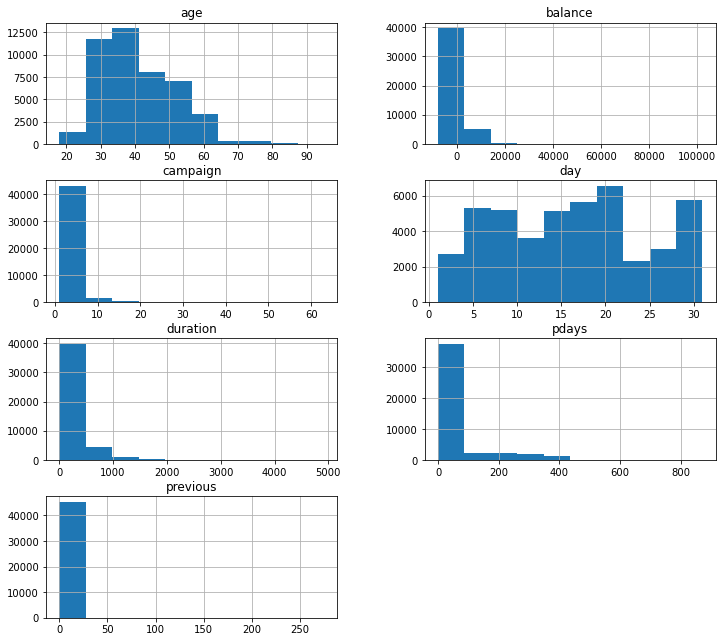

In [8]:
import warnings
warnings.filterwarnings('ignore')
# Generate histograms for continuous variable
bank_data.hist(column= ["age", "balance", "day", "duration", "campaign", "pdays", "previous"], \
                           stacked=True, bins=10, figsize=(12,40), layout=(14,2));

The histograms above indicate that continuous variables such as pdays, duration, campaign etc are skewed to the left. They may require further transformation before they are used for further analysis.

<h3 style="color:Tomato;"> We observed many outliers from the histograms and statistical values of the continuous variables. There are two strategies that we can employ to treat the outliers and data pollution; namely remove the outliers, cap the outliers, assign new values to the outliers, or transform the outliers. </h3>

<h3 style="color:Blue;"> We are going to create a new data set with outliers removed and data transformed using log function </h3>

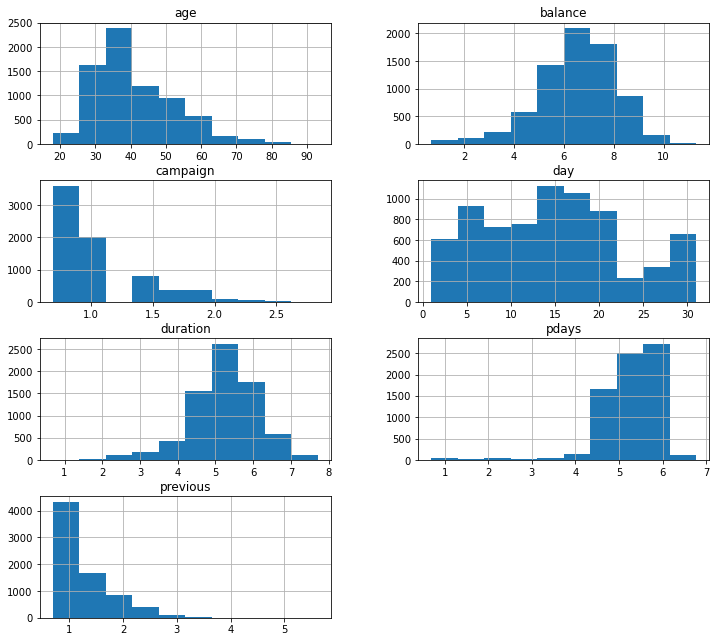

In [9]:
# Many datasets have outlier to the right, and they seem to demonstrate exponetial growth distribution. We use log1p to
# transform the data for visualization
def transform_data(df, features_to_remove_outlier):
    for feature in features_to_remove_outlier:
        if df[feature].dtype == 'int64': # Look for integer data series
            if np.min(df[feature])>0:
                #print(feature)
                df[feature] = np.log1p(df[feature]) # Transform the exponential growth distribution data
                
    return df

features_to_log_transform = ['balance', 'campaign', 'duration', 'pdays', 'previous']
bank_data_log = bank_data.copy(deep=True)

# We remove the data below 0 to allow log1p transformation
bank_data_log = bank_data_log[(bank_data_log['balance']>0) & (bank_data_log['campaign']>0)] 
bank_data_log = bank_data_log[(bank_data_log['duration']>0) & (bank_data_log['pdays']>0)]
bank_data_log = bank_data_log[(bank_data_log['previous']>0)]

for feature in features_to_log_transform:
    if bank_data_log[feature].dtype == 'int64': # Look for integer type data series
        if np.min(bank_data_log[feature])>0: # Log1p cannot accept value below 0
            #print(feature)
            bank_data_log[feature] = np.log1p(bank_data_log[feature])

bank_data_log.hist(stacked=False, bins=10, figsize=(12,40), layout=(14,2)); # Look at how data is distributed     

The datasets are not more linearly distributed after being transformed by log1p function

In [10]:
bank_data.corr() # We ran a correlation analysis to observe linear correaltion of various variables

age   balance       day  duration  campaign     pdays  previous
age       1.000000  0.097783 -0.009120 -0.004648  0.004760 -0.023758  0.001288
balance   0.097783  1.000000  0.004503  0.021560 -0.014578  0.003435  0.016674
day      -0.009120  0.004503  1.000000 -0.030206  0.162490 -0.093044 -0.051710
duration -0.004648  0.021560 -0.030206  1.000000 -0.084570 -0.001565  0.001203
campaign  0.004760 -0.014578  0.162490 -0.084570  1.000000 -0.088628 -0.032855
pdays    -0.023758  0.003435 -0.093044 -0.001565 -0.088628  1.000000  0.454820
previous  0.001288  0.016674 -0.051710  0.001203 -0.032855  0.454820  1.000000

Most datasets are not correlated except pdays and previous.

### 1.1.3 Range of values observed for categorical variables

In [11]:
for feature in bank_data.columns: # Get all the column names of a data frame
    if bank_data[feature].dtype == 'object': # Look for non integer data series
        bank_data[feature] = pd.Categorical(bank_data[feature])# Replace the string with categorical data

In [12]:
bank_data.info() # Look at data type to observe whether string variables have been converted to category variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null category
marital      45211 non-null category
education    45211 non-null category
default      45211 non-null category
balance      45211 non-null int64
housing      45211 non-null category
loan         45211 non-null category
contact      45211 non-null category
day          45211 non-null int64
month        45211 non-null category
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null category
Target       45211 non-null category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


In [13]:
# Convert categorical data to numerical data

for header in bank_data.columns:
    dtype_str = str(bank_data[header].dtype) # Check for categorical data
    if dtype_str in "category":
        unique_values = str(bank_data[header].unique().tolist()) # Generate a list of unique variables
        number_of_missing_data = bank_data[header].isnull().sum().sum() # Check for missing data, if any
        print(f"{header} = {unique_values}, missing data = {number_of_missing_data}")

job = ['management', 'technician', 'entrepreneur', 'blue-collar', 'unknown', 'retired', 'admin.', 'services', 'self-employed', 'unemployed', 'housemaid', 'student'], missing data = 0
marital = ['married', 'single', 'divorced'], missing data = 0
education = ['tertiary', 'secondary', 'unknown', 'primary'], missing data = 0
default = ['no', 'yes'], missing data = 0
housing = ['yes', 'no'], missing data = 0
loan = ['no', 'yes'], missing data = 0
contact = ['unknown', 'cellular', 'telephone'], missing data = 0
month = ['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep'], missing data = 0
poutcome = ['unknown', 'failure', 'other', 'success'], missing data = 0
Target = ['no', 'yes'], missing data = 0


These categorical variables can be further converted to numerical number so that they are suitable to be used for classification.

# 1.2 Job Types

In [14]:
pd.pivot_table(bank_data, index=['Target'], columns=['job'], values=['month'], aggfunc='count') # To classify job types against Target results

month                                                        \
job    admin. blue-collar entrepreneur housemaid management retired   
Target                                                                
no       4540        9024         1364      1131       8157    1748   
yes       631         708          123       109       1301     516   

                                                                     
job    self-employed services student technician unemployed unknown  
Target                                                               
no              1392     3785     669       6757       1101     254  
yes              187      369     269        840        202      34

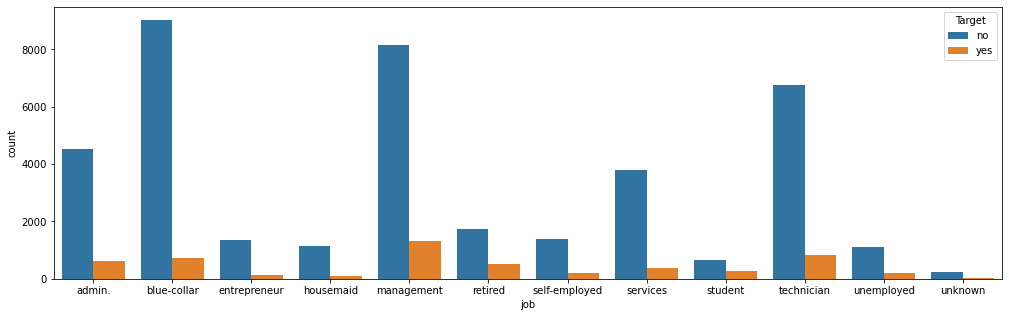

In [15]:
plt.figure(figsize=(17,5))
sns.countplot(bank_data['job'], data=bank_data, hue="Target")

A significant portion of the customers have been working as admin, blue-collar, management and technician. However, management form the biggest group as the currrent deposit subscribers.

## 1.3 Marital Status

In [16]:
pd.pivot_table(bank_data, index=['Target'], columns=['marital', 'education' ], values=['month'], aggfunc='count') # To classify marital status against Target results

month                                                        \
marital   divorced                            married                      
education  primary secondary tertiary unknown primary secondary tertiary   
Target                                                                     
no             648      2524     1268     145    4850     12466     6125   
yes            104       291      203      24     396      1304      913   

                                                      
marital            single                             
education unknown primary secondary tertiary unknown  
Target                                                
no           1018     762      5762     3912     442  
yes           142      91       855      880      86

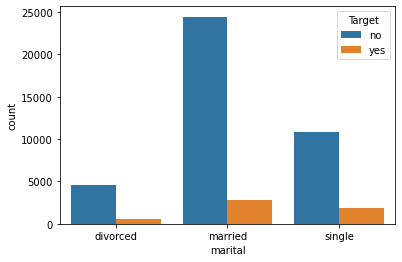

In [17]:
sns.countplot(bank_data['marital'], data=bank_data, hue="Target") # To observe patterns of marital status

Most of the customers are married, but customers with single status form significant deposit subscribers.

## 1.4 Default and outcome of campaign

In [18]:
pd.pivot_table(bank_data, index=['Target'], columns=['default', 'poutcome' ], values=['age'], aggfunc='count') # To classify job types against default results

age                                                       
default       no                              yes                      
poutcome failure   other success  unknown failure other success unknown
Target                                                                 
no        4247.0  1519.0   531.0  32862.0    36.0  14.0     2.0   711.0
yes        615.0   305.0   978.0   3339.0     3.0   2.0     NaN    47.0

There are not many default cases. Furthermore, only less than 60 customers with default status were targeted in the previous campaigns. 

## 1.5 campaign 

In [19]:
bank_data['day_bins'] = pd.qcut(bank_data['day'], q=4)
bank_data['day_bins'].value_counts() # To study the distribution of equal amounts for campaign dataset

(8.0, 16.0]     11718
(0.999, 8.0]    11640
(21.0, 31.0]    11071
(16.0, 21.0]    10782
Name: day_bins, dtype: int64

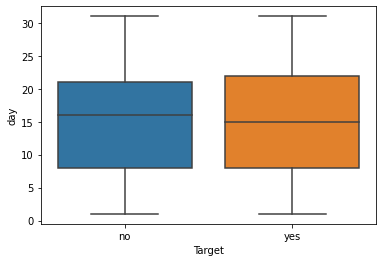

In [20]:
sns.boxplot(x=bank_data["Target"], y=bank_data["day"]) # Study the box plot of day classified by Target

## 1.6 Duration

In [21]:
bank_data['duration_bins'] = pd.cut(bank_data['duration'], bins=10) # To study the data count for range of duration
bank_data['duration_bins'].value_counts()

(-4.918, 491.8]     39677
(491.8, 983.6]       4425
(983.6, 1475.4]       865
(1475.4, 1967.2]      176
(1967.2, 2459.0]       43
(2950.8, 3442.6]       11
(2459.0, 2950.8]       11
(3442.6, 3934.4]        2
(4426.2, 4918.0]        1
(3934.4, 4426.2]        0
Name: duration_bins, dtype: int64

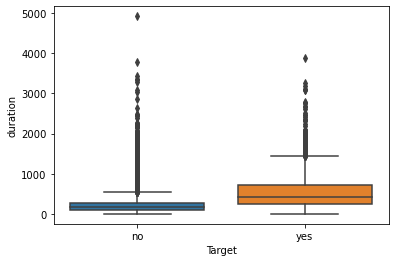

In [22]:
sns.boxplot(x=bank_data["Target"], y=bank_data["duration"]) # to study the median value of duration for successful and failed Target

In [23]:
pd.pivot_table(bank_data, index=['Target'], columns=['duration_bins'], values=['age'], aggfunc='count') # To classify job types against duration results

age                                                  \
duration_bins (-4.918, 491.8] (491.8, 983.6] (983.6, 1475.4] (1475.4, 1967.2]   
Target                                                                          
no                    36702.0         2776.0           348.0             64.0   
yes                    2975.0         1649.0           517.0            112.0   

                                                                  \
duration_bins (1967.2, 2459.0] (2459.0, 2950.8] (2950.8, 3442.6]   
Target                                                             
no                        20.0              4.0              6.0   
yes                       23.0              7.0              5.0   

                                                 
duration_bins (3442.6, 3934.4] (4426.2, 4918.0]  
Target                                           
no                         1.0              1.0  
yes                        1.0              NaN

The table above seems to show a sweet spot for campaign duration between 491.8 to 1475.4 when the successful percentage is higher than other duration periods.

<br><br>
# 2. Multivariate analysis (8 marks)

In [24]:
percentage = lambda x:x.value_counts()/bank_data.shape[0]*100 # Take a look at the percentage distribution 
bank_data[['poutcome', 'Target', 'education', 'default', 'loan']].apply(percentage).transpose()

failure         no     other    primary  secondary   success  \
poutcome   10.840282        NaN  4.069806        NaN        NaN  3.342107   
Target           NaN  88.301520       NaN        NaN        NaN       NaN   
education        NaN        NaN       NaN  15.153392  51.319369       NaN   
default          NaN  98.197341       NaN        NaN        NaN       NaN   
loan             NaN  83.977351       NaN        NaN        NaN       NaN   

            tertiary    unknown        yes  
poutcome         NaN  81.747805        NaN  
Target           NaN        NaN  11.698480  
education  29.419831   4.107407        NaN  
default          NaN        NaN   1.802659  
loan             NaN        NaN  16.022649

We realize that the "yes" for Target is only 11.7% compared to "no" for Target. There are also a lot of unknown poutcome.

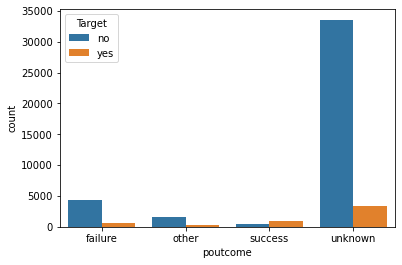

In [25]:
sns.countplot(bank_data['poutcome'], data=bank_data, hue="Target")  # To generate the distribution of success and failure of targets

In [26]:
bank_data.groupby(['poutcome'])["Target"].count()/bank_data.shape[0]

poutcome
failure    0.108403
other      0.040698
success    0.033421
unknown    0.817478
Name: Target, dtype: float64

The figure above shows that majority of data with "unknown" poutcome values also contain "yes" Target variable. A very significant insight about Target variable will be lost if dataset with "unknown" poutcome values are removed.

Therefore, we don't recommend removing "unknown" poutcome from the dataset.

## 2.1 Multivariate analysis for raw data with outliers

In [27]:
import pandas
from sklearn import preprocessing
from collections import defaultdict
d = defaultdict(preprocessing.LabelEncoder)

bank_data_transformed = bank_data.apply(lambda x: d[x.name].fit_transform(x)) # Convert categorical to continuous variables
bank_data_transformed.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   40    4        1          2        0     3036        1     0        2   
1   26    9        2          1        0      945        1     0        2   
2   15    2        1          1        0      918        1     1        2   
3   29    1        1          3        0     2420        1     0        2   
4   15   11        2          3        0      917        0     0        2   

   day  month  duration  campaign  pdays  previous  poutcome  Target  \
0    4      8       261         0      0         0         3       0   
1    4      8       151         0      0         0         3       0   
2    4      8        76         0      0         0         3       0   
3    4      8        92         0      0         0         3       0   
4    4      8       198         0      0         0         3       0   

   day_bins  duration_bins  
0         0              0  
1         0              0  
2         0              0  
3         0              0  
4         0              0

We can choose either fit transform or one-hot encoding. We choose fit transform to generate variables because it will generate less independent variables compared to one hot encoding.

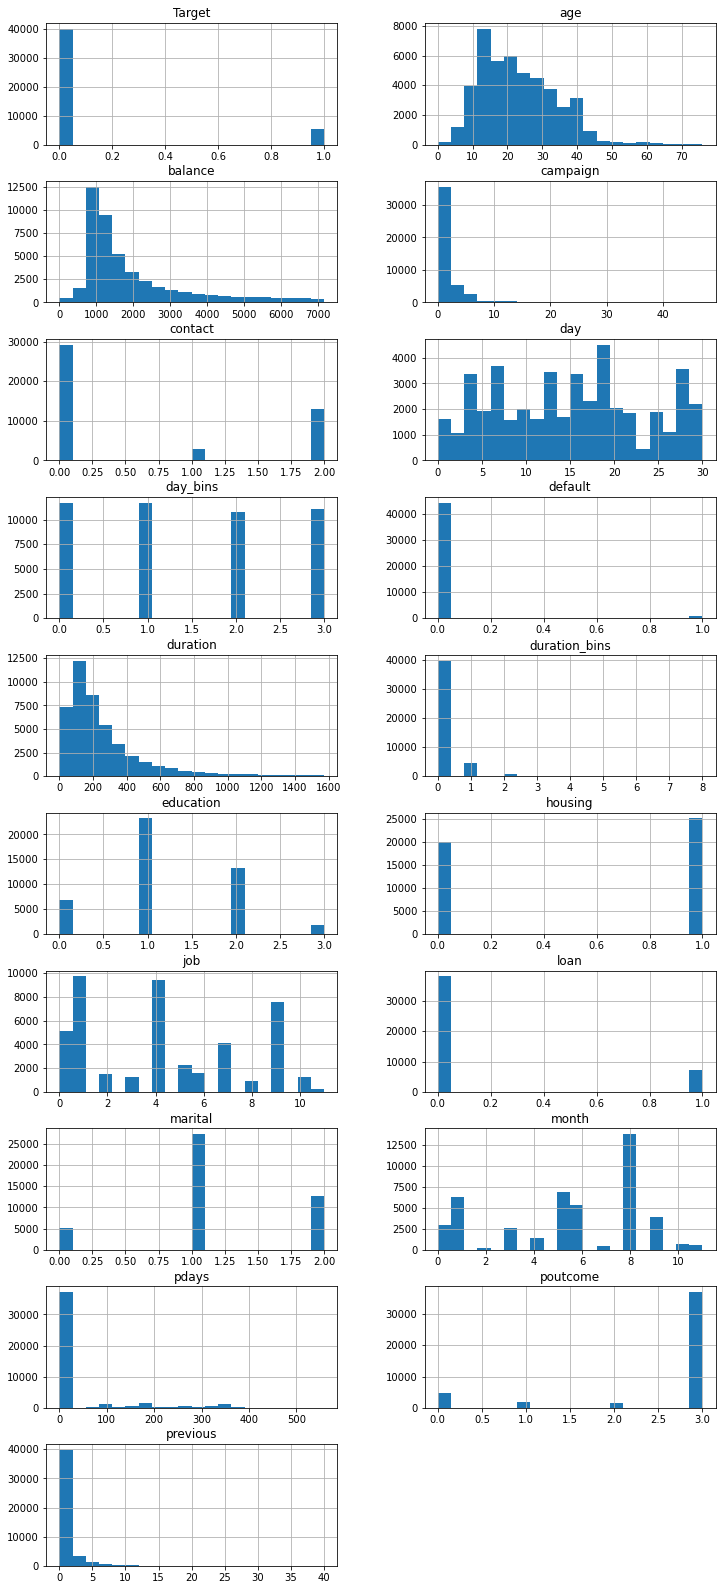

In [28]:
bank_data_transformed.hist(stacked=False, bins=20, figsize=(12,40), layout=(14,2)); 

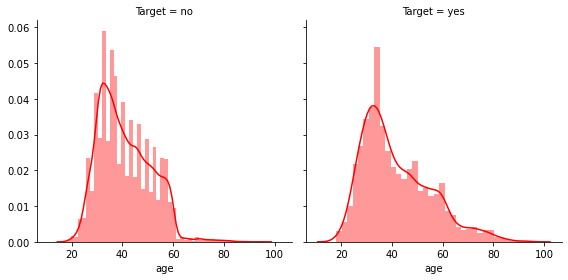

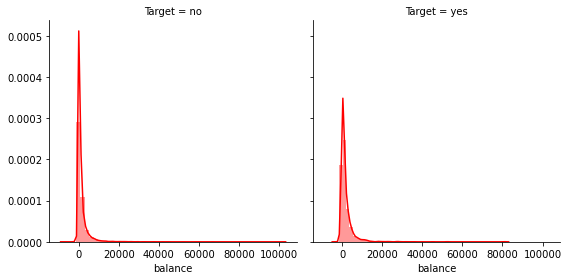

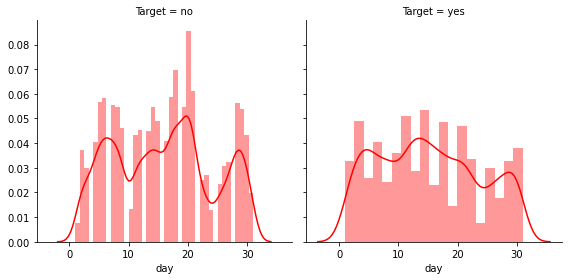

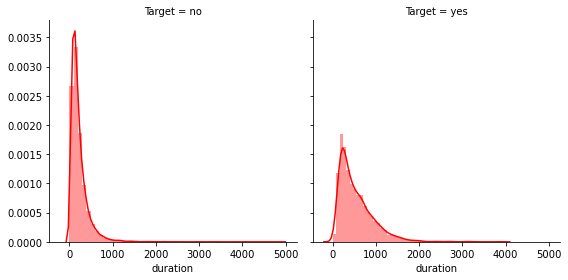

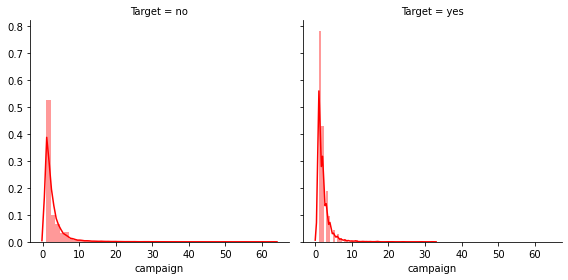

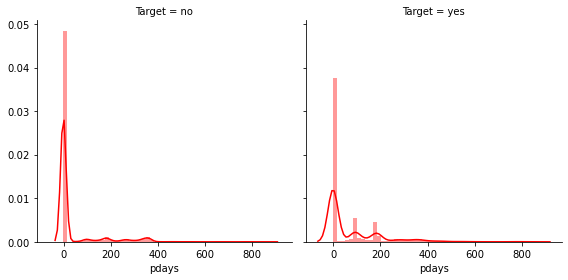

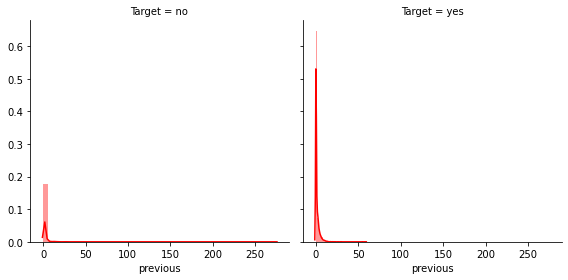

<Figure size 432x288 with 0 Axes>

In [29]:
# To generate distribution of variables with successful and failed targets
for feature in ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]:
    if "Target" not in feature:
        g = sns.FacetGrid(bank_data[[feature,"Target"]], col="Target", height=4)
        g.map(sns.distplot, feature, color="r");
plt.figure()
plt.show()

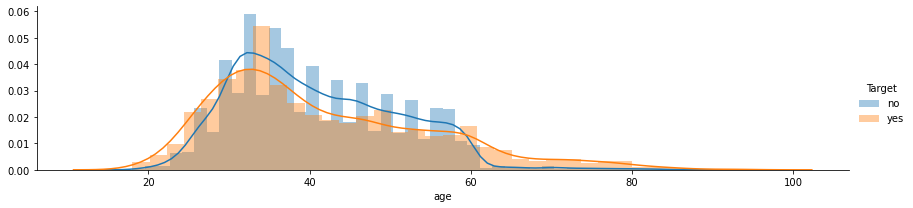

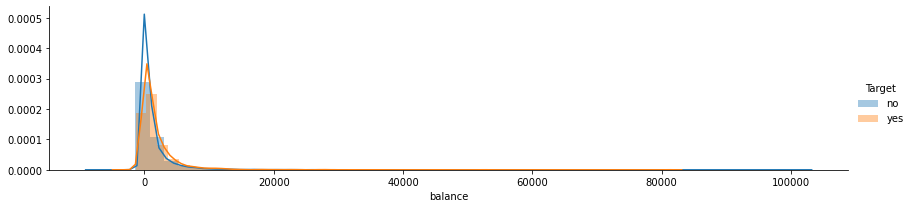

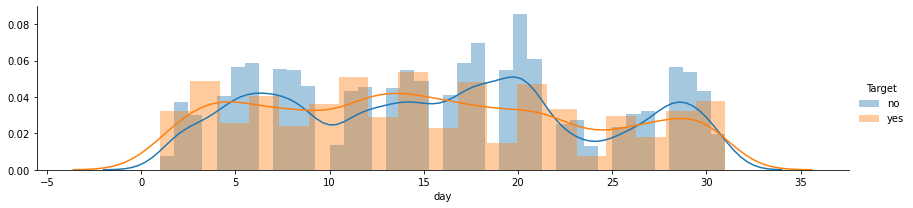

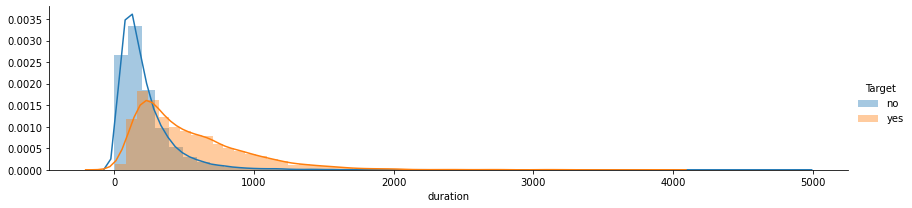

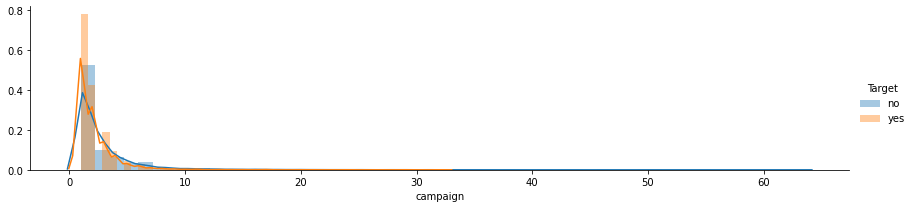

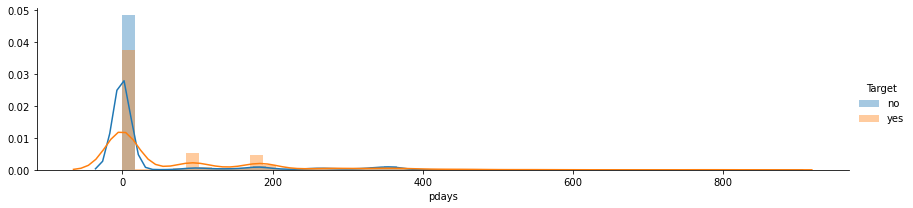

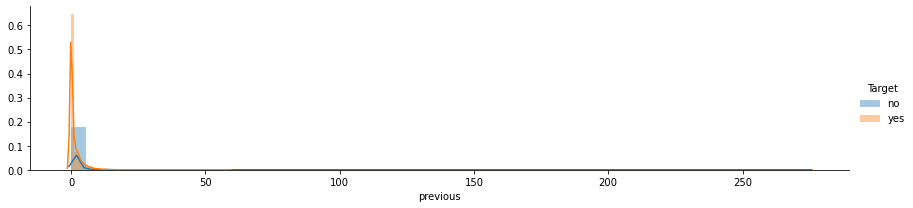

<Figure size 432x288 with 0 Axes>

In [30]:
# Generate chart for continuous independent variables and segregate by outcomes of the Target
for feature in ["age", "balance", "day", "duration", "campaign", "pdays", "previous"]:
    if "Target" not in feature:
        g = sns.FacetGrid(bank_data[[feature,"Target"]], hue="Target", height=3, aspect=4)
        g = (g.map(sns.distplot, feature, norm_hist=False).add_legend())
plt.figure()
plt.show()

distplot is used to take a quick look at univariate distribution of the continuous variables. The following is our observation: <br>
i) Age - The age variable has similar distribution for successful and failed outcomes of subscription to term deposits. However, we discovered that customers with age above 60 seem to have better success than failed rates. <br>
ii) Duration - Longer duration seems to bring better positive outcome for success 

In [31]:
bank_data_log_transform = bank_data_log.copy(deep=True) # We also generate data that is transformed by Log function
bank_data_log_transform = bank_data_log_transform.apply(lambda x: d[x.name].fit_transform(x)) # Transform categorical variables to numerical variables for classification

In [32]:
bank_data_transformed.corr() # generate correlation matrix

age       job   marital  education   default   balance  \
age            1.000000 -0.021872 -0.403258  -0.106829 -0.017879  0.119073   
job           -0.021872  1.000000  0.062045   0.166707 -0.006853  0.026004   
marital       -0.403258  0.062045  1.000000   0.108576 -0.007023  0.006913   
education     -0.106829  0.166707  0.108576   1.000000 -0.010718  0.071495   
default       -0.017879 -0.006853 -0.007023  -0.010718  1.000000 -0.105660   
balance        0.119073  0.026004  0.006913   0.071495 -0.105660  1.000000   
housing       -0.185510 -0.125363 -0.016096  -0.090790 -0.006025 -0.078896   
loan          -0.015650 -0.033004 -0.046893  -0.048574  0.077234 -0.114077   
contact        0.026229 -0.082063 -0.039201  -0.110928  0.015404 -0.036057   
day           -0.009118  0.022856 -0.005261   0.022671  0.009424  0.010893   
month         -0.042359 -0.092870 -0.006991  -0.057304  0.011486  0.023925   
duration      -0.006796  0.004094  0.012364   0.002275 -0.009455  0.038270   
campaign       0.005023  0.006882 -0.009176   0.006193  0.017007 -0.025987   
pdays         -0.024404 -0.025099  0.019636  -0.001356 -0.029970  0.012325   
previous       0.002070 -0.000883  0.018810   0.018873 -0.021983  0.039646   
poutcome       0.007367  0.011010 -0.016850  -0.019361  0.034898 -0.041198   
Target         0.025130  0.040438  0.045588   0.066241 -0.022419  0.082873   
day_bins      -0.009527  0.026839 -0.004185   0.027494  0.009550  0.013145   
duration_bins  0.002597  0.000987  0.006235   0.002954 -0.009287  0.028910   

                housing      loan   contact       day     month  duration  \
age           -0.185510 -0.015650  0.026229 -0.009118 -0.042359 -0.006796   
job           -0.125363 -0.033004 -0.082063  0.022856 -0.092870  0.004094   
marital       -0.016096 -0.046893 -0.039201 -0.005261 -0.006991  0.012364   
education     -0.090790 -0.048574 -0.110928  0.022671 -0.057304  0.002275   
default       -0.006025  0.077234  0.015404  0.009424  0.011486 -0.009455   
balance       -0.078896 -0.114077 -0.036057  0.010893  0.023925  0.038270   
housing        1.000000  0.041323  0.188123 -0.027982  0.271481  0.005878   
loan           0.041323  1.000000 -0.010873  0.011370  0.022145 -0.013354   
contact        0.188123 -0.010873  1.000000 -0.027936  0.361145 -0.024421   
day           -0.027982  0.011370 -0.027936  1.000000 -0.006028 -0.032022   
month          0.271481  0.022145  0.361145 -0.006028  1.000000  0.006096   
duration       0.005878 -0.013354 -0.024421 -0.032022  0.006096  1.000000   
campaign      -0.024178  0.010102  0.019213  0.163353 -0.111055 -0.090308   
pdays          0.127521 -0.022699 -0.248608 -0.094545  0.031766  0.000942   
previous       0.042332 -0.012729 -0.178903 -0.058829  0.030089  0.001730   
poutcome      -0.099971  0.015458  0.272214  0.083460 -0.033038  0.009401   
Target        -0.139173 -0.068185 -0.148395 -0.028348 -0.024471  0.407875   
day_bins      -0.044147  0.013126 -0.035240  0.965712 -0.018669 -0.032134   
duration_bins  0.007251 -0.007892 -0.011914 -0.006906  0.004383  0.863626   

               campaign     pdays  previous  poutcome    Target  day_bins  \
age            0.005023 -0.024404  0.002070  0.007367  0.025130 -0.009527   
job            0.006882 -0.025099 -0.000883  0.011010  0.040438  0.026839   
marital       -0.009176  0.019636  0.018810 -0.016850  0.045588 -0.004185   
education      0.006193 -0.001356  0.018873 -0.019361  0.066241  0.027494   
default        0.017007 -0.029970 -0.021983  0.034898 -0.022419  0.009550   
balance       -0.025987  0.012325  0.039646 -0.041198  0.082873  0.013145   
housing       -0.024178  0.127521  0.042332 -0.099971 -0.139173 -0.044147   
loan           0.010102 -0.022699 -0.012729  0.015458 -0.068185  0.013126   
contact        0.019213 -0.248608 -0.178903  0.272214 -0.148395 -0.035240   
day            0.163353 -0.094545 -0.058829  0.083460 -0.028348  0.965712   
month         -0.111055  0.031766  0.030089 -0.033038 -0.024471 -0.0186

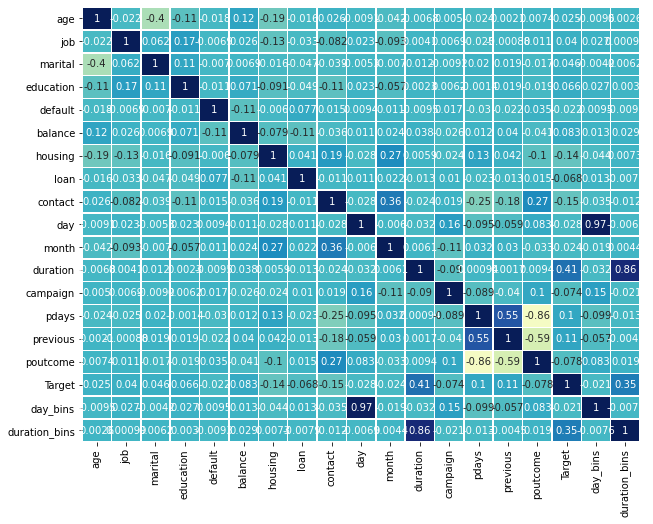

In [33]:
plt.figure(figsize=(10,8))

# Generate correlation matrix and show it using heat map
sns.heatmap(
    bank_data_transformed.corr(),
    annot=True,
    linewidths=.5,
    center=0,
    cbar=False,
    cmap="YlGnBu"
)

plt.show()

Correlation values show that most variables are not strongly linearly correlated, except poutcome is reasonably correlated to Target.

In [34]:
bank_data_transformed.groupby(['poutcome']).mean() # To review poutcome variable, and to decide whether to clean up poutcome

age       job   marital  education   default      balance  \
poutcome                                                                    
0         22.786166  4.195062  1.177515   1.245460  0.007958  2080.204244   
1         21.752174  4.282609  1.221196   1.233696  0.008696  2049.509783   
2         24.962938  4.820649  1.245533   1.430841  0.001324  2400.184646   
3         22.932006  4.342136  1.160583   1.213209  0.020509  1925.653724   

           housing      loan   contact        day     month    duration  \
poutcome                                                                  
0         0.708019  0.157927  0.082228  13.166701  5.792491  242.672720   
1         0.651630  0.144022  0.125000  13.475000  5.601630  253.947283   
2         0.311714  0.054269  0.091330  13.449371  5.649239  315.297816   
3         0.540870  0.165670  0.762331  15.145621  5.478206  254.636002   

          campaign       pdays  previous    Target  day_bins  duration_bins  
poutcome                                                                     
0         0.980820  236.567435  2.887778  0.126097  1.248725       0.124872  
1         1.461413  224.715217  3.861413  0.166848  1.281522       0.151630  
2         0.806089  159.616810  3.075447  0.647253  1.333554       0.190602  
3         1.920101    0.036175  0.000460  0.091615  1.515247       0.157445

In [35]:
bank_data.head(2)

age         job  marital  education default  balance housing loan  contact  \
0   58  management  married   tertiary      no     2143     yes   no  unknown   
1   44  technician   single  secondary      no       29     yes   no  unknown   

   day month  duration  campaign  pdays  previous poutcome Target  \
0    5   may       261         1     -1         0  unknown     no   
1    5   may       151         1     -1         0  unknown     no   

       day_bins    duration_bins  
0  (0.999, 8.0]  (-4.918, 491.8]  
1  (0.999, 8.0]  (-4.918, 491.8]

In [36]:
import plotly.graph_objects as go # Use plotly to generate interactive graphs

fig = go.Figure()

# This function generates combination of scenarios that are classified by "Target" outcomes of yes and no, in respect to bank saving balance
def generate_box_chart(df, default, target):
    bank_data_after_transformation = df[(df['Target']==target)][(df['default']==default)] # filter data based on state of Target and Default
    state_of_box_plot = f"default={default}; target={target}"
    bank_data_after_transformation[state_of_box_plot] = bank_data_after_transformation[['default','Target']].apply(lambda x: f"default={x['default']},target={x['Target']}", axis=1)
    #print(bank_data_after_transformation.head())
    
    fig.add_trace(go.Box(
    y = bank_data_after_transformation['balance'],
    x = bank_data_after_transformation[state_of_box_plot],
    name=f"default={default}, target={target}",
    fillcolor='#3D9970'
))

generate_box_chart(bank_data, 'yes', 'yes') # To generate plot graph for default=yes, target=yes
generate_box_chart(bank_data, 'yes', 'no') # To generate plot graph for default=yes, target=no
generate_box_chart(bank_data, 'no', 'yes') # To generate plot graph for default=no, target=yes
generate_box_chart(bank_data, 'no', 'no') # To generate plot graph for default=no, target=no

fig.show()

An interactive chart will be generated by Jupyter notebook. It is observed in the picture above that customers with no default and with successful target tend to have better saving balance in their bank account. They have $755 median saving balance in their bank account.

## 2.2 Multivariate analysis for data without outliers and values transformed

In [37]:
bank_data_log_transform = bank_data_log.copy(deep=True) # Convert categorical data to continuous variables for visualization
bank_data_log_transform = bank_data_log_transform.apply(lambda x: d[x.name].fit_transform(x))

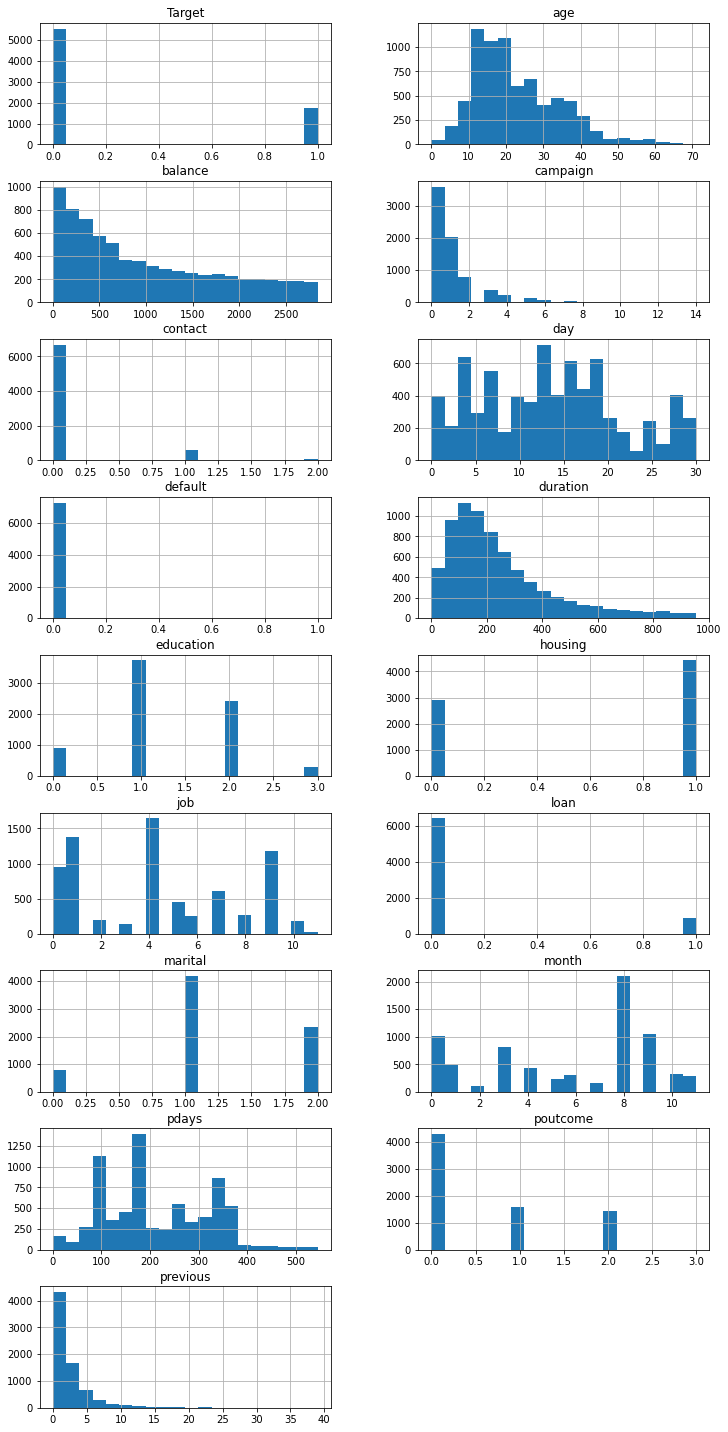

In [38]:
bank_data_log_transform.hist(stacked=False, bins=20, figsize=(12,40), layout=(14,2)); 

In [39]:
bank_data_log_transform.corr() 

age       job   marital  education   default   balance  \
age        1.000000 -0.028669 -0.419561  -0.126033 -0.016634  0.153670   
job       -0.028669  1.000000  0.076643   0.157938 -0.010661  0.048309   
marital   -0.419561  0.076643  1.000000   0.127369 -0.008069 -0.041486   
education -0.126033  0.157938  0.127369   1.000000 -0.015819  0.081149   
default   -0.016634 -0.010661 -0.008069  -0.015819  1.000000 -0.037222   
balance    0.153670  0.048309 -0.041486   0.081149 -0.037222  1.000000   
housing   -0.171910 -0.130951 -0.060800  -0.133736  0.000712 -0.120763   
loan      -0.009002 -0.030719 -0.046161  -0.043164  0.031989 -0.083845   
contact    0.161933 -0.004747 -0.031694  -0.047318 -0.006172  0.027712   
day        0.016486  0.011462  0.020745   0.018044  0.018057  0.068892   
month      0.016818 -0.000388 -0.025197  -0.007686  0.011574  0.038019   
duration   0.053871  0.028292 -0.002547  -0.003695  0.012155  0.072722   
campaign   0.003467 -0.011564 -0.006302  -0.025150 -0.010316 -0.007226   
pdays     -0.105693 -0.115356 -0.015032  -0.145246  0.015677 -0.169322   
previous   0.008499  0.000839  0.005374  -0.006321  0.009303  0.014346   
poutcome   0.056146  0.066960  0.040129   0.082615 -0.010422  0.055986   
Target     0.075241  0.081124  0.051199   0.106615 -0.015180  0.089242   

            housing      loan   contact       day     month  duration  \
age       -0.171910 -0.009002  0.161933  0.016486  0.016818  0.053871   
job       -0.130951 -0.030719 -0.004747  0.011462 -0.000388  0.028292   
marital   -0.060800 -0.046161 -0.031694  0.020745 -0.025197 -0.002547   
education -0.133736 -0.043164 -0.047318  0.018044 -0.007686 -0.003695   
default    0.000712  0.031989 -0.006172  0.018057  0.011574  0.012155   
balance   -0.120763 -0.083845  0.027712  0.068892  0.038019  0.072722   
housing    1.000000  0.104314 -0.060861 -0.054060  0.003216 -0.085522   
loan       0.104314  1.000000 -0.015096  0.008091 -0.004269 -0.039406   
contact   -0.060861 -0.015096  1.000000 -0.006859  0.054346 -0.057492   
day       -0.054060  0.008091 -0.006859  1.000000 -0.022164 -0.011720   
month      0.003216 -0.004269  0.054346 -0.022164  1.000000 -0.033325   
duration  -0.085522 -0.039406 -0.057492 -0.011720 -0.033325  1.000000   
campaign   0.061689  0.006451  0.065221 -0.029142  0.023290 -0.095838   
pdays      0.356149  0.023858  0.054380 -0.087233  0.000764 -0.026887   
previous   0.004106  0.022516  0.062074 -0.013166  0.021476 -0.009241   
poutcome  -0.290683 -0.100782  0.021488  0.008912 -0.004669  0.130172   
Target    -0.322467 -0.113574 -0.016462  0.025167 -0.001941  0.368360   

           campaign     pdays  previous  poutcome    Target  
age        0.003467 -0.105693  0.008499  0.056146  0.075241  
job       -0.011564 -0.115356  0.000839  0.066960  0.081124  
marital   -0.006302 -0.015032  0.005374  0.040129  0.051199  
education -0.025150 -0.145246 -0.006321  0.082615  0.106615  
default   -0.010316  0.015677  0.009303 -0.010422 -0.015180  
balance   -0.007226 -0.169322  0.014346  0.055986  0.089242  
housing    0.061689  0.356149  0.004106 -0.290683 -0.322467  
loan       0.006451  0.023858  0.022516 -0.100782 -0.113574  
contact    0.065221  0.054380  0.062074  0.021488 -0.016462  
day       -0.029142 -0.087233 -0.013166  0.008912  0.025167  
month      0.023290  0.000764  0.021476 -0.004669 -0.001941  
duration  -0.095838 -0.026887 -0.009241  0.130172  0.368360  
campaign   1.000000  0.063467  0.174508 -0.001197 -0.092978  
pdays      0.063467  1.000000 -0.043343 -0.241740 -0.167176  
previous   0.174508 -0.043343  1.000000  0.046896  0.012500  
poutcome  -0.001197 -0.241740  0.046896  1.000000  0.426693  
Target    -0.092978 -0.167176  0.012500  0.426693  1.000000

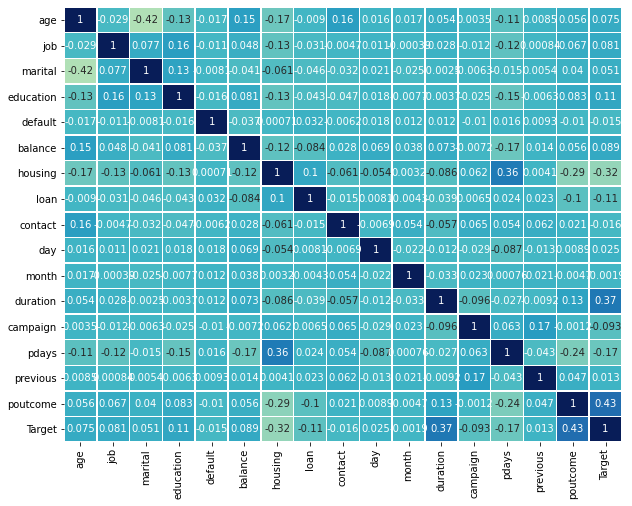

In [40]:
plt.figure(figsize=(10,8))

sns.heatmap(
    bank_data_log_transform.corr(),
    annot=True,
    linewidths=.5,
    center=0,
    cbar=False,
    cmap="YlGnBu"
)

plt.show()

Correlation graph is generated for data with outliers removed and data transformed by log function. However, there is little difference between this graph and another correlation graph that is generated by data with outliers.

## 2.3 Perform multivariate analysis of highly correlated data
Referring to the graph above, we have found that "Target" independent variables are correlated to top 3 features poutcome, duration, and balance, and inversely correlated to housing, pday and loan.

### 2.3.1 Top 3 correlated variables

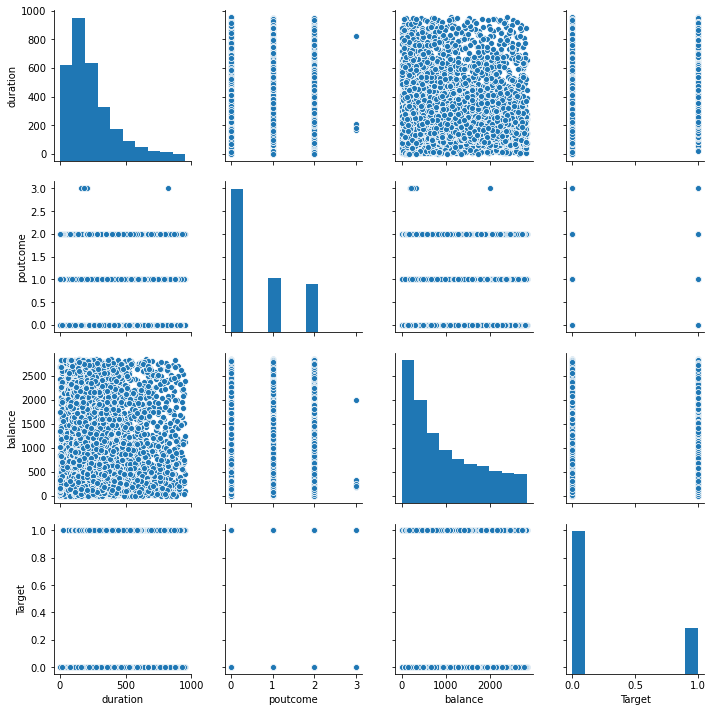

In [41]:
sns.pairplot(bank_data_log_transform[['duration', "poutcome", "balance", "Target"]])

<br><br>
# 3.0 Prepare the data for analytics

In [42]:
bank_data = pd.read_csv("bank-full.csv") 

X = bank_data.drop(columns=['Target']) # Prepare indepedent variables
X = pd.get_dummies(X)
y = bank_data.pop('Target') # Prepare dependent variable
features = X.columns # The names of the independent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=22) # Create the training set and test set in ration of 70:30
print(f"xtrain shape = {X_train.shape}, ytrain shape = {X_test.shape}")

xtrain shape = (31647, 51), ytrain shape = (13564, 51)


## 3.1 Decision Tree

In [43]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix # Import libraries
from yellowbrick.classifier import ClassificationReport, ROCAUC

model_entropy = DecisionTreeClassifier(criterion='entropy') # Use entropy as criterion

In [44]:
model_entropy.fit(X_train, y_train)
print("Train: %.2f" % model_entropy.score(X_train, y_train))  # performance on train data
print("Test: %.2f" % model_entropy.score(X_test, y_test))  # performance on test data

Train: 1.00
Test: 0.87


The big difference between trained and tested accuracy indicate overfitting of the decision tree for the Target

In [45]:
clf_pruned = DecisionTreeClassifier(criterion = "entropy", max_depth=4)
clf_pruned.fit(X_train, y_train)

print("Train: %.3f" % clf_pruned.score(X_train, y_train))  # performance on train data
print("Test: %.3f" % clf_pruned.score(X_test, y_test))  # performance on test data

Train: 0.901
Test: 0.899


The small difference between trained and tested accuracy indicate that the model is not overfitting.

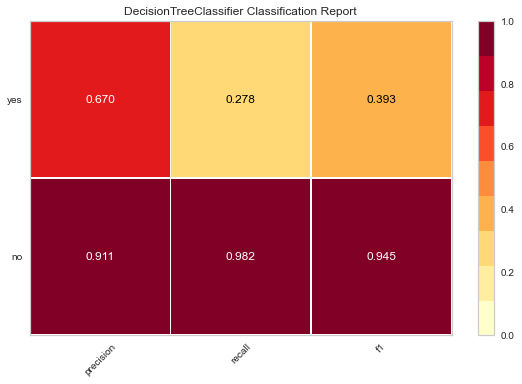

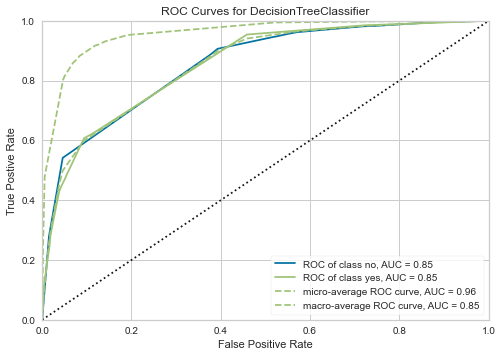

In [46]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(DecisionTreeClassifier(criterion = "entropy", max_depth=4))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

In [47]:
## Calculating feature importance

feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)

feat_imp_dict = dict(zip(features, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
duration             0.590434
poutcome_success     0.277898
contact_unknown      0.114414
month_oct            0.008296
contact_cellular     0.005489
housing_no           0.003469
age                  0.000000
month_dec            0.000000
housing_yes          0.000000
loan_no              0.000000
loan_yes             0.000000
contact_telephone    0.000000
month_apr            0.000000
month_aug            0.000000
month_jan            0.000000
month_feb            0.000000
default_no           0.000000
month_jul            0.000000
month_jun            0.000000
month_mar            0.000000
month_may            0.000000
month_nov            0.000000
month_sep            0.000000
poutcome_failure     0.000000
poutcome_other       0.000000
default_yes          0.000000
education_unknown    0.000000
balance              0.000000
education_tertiary   0.000000
day                  0.000000
campaign             0.000000
pdays                0.000000
previous             0.000000
job_admin.           0.000000
job_blue-collar      0.000000
job_entrepreneur     0.000000
job_housemaid        0.000000
job_management       0.000000
job_retired          0.000000
job_self-employed    0.000000
job_services         0.000000
job_student          0.000000
job_technician       0.000000
job_unemployed       0.000000
job_unknown          0.000000
marital_divorced     0.000000
marital_married      0.000000
marital_single       0.000000
education_primary    0.000000
education_secondary  0.000000
poutcome_unknown     0.000000

In [48]:
# Store the accuracy results for each model in a dataframe for final comparison
preds_train = clf_pruned.predict(X_train)
preds_test = clf_pruned.predict(X_test)

acc_DT = accuracy_score(y_test, preds_test)

resultsDf = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree  0.899292

<br><br>
# 4. Create the ensemble model

## 4.1 Random Forest Classifier

In [49]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree  0.899292
0  Random Forest  0.904969

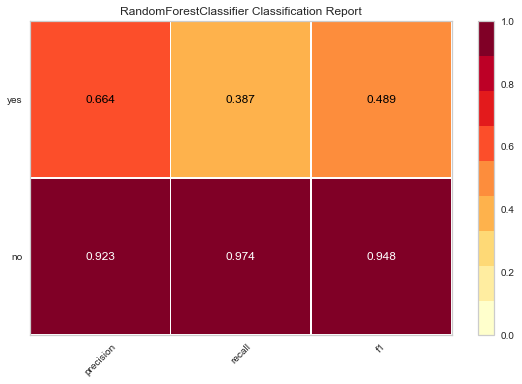

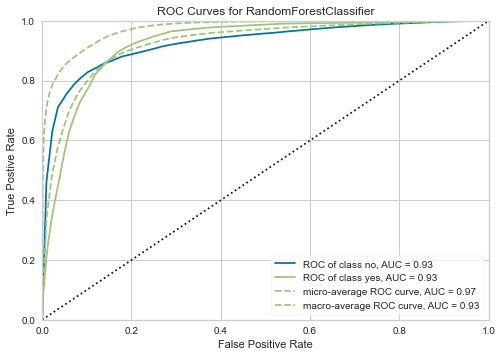

In [50]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## 4.2 Ada Boost Classifier

In [51]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

pred_AB = abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree  0.899292
0  Random Forest  0.904969
0       Adaboost  0.895311

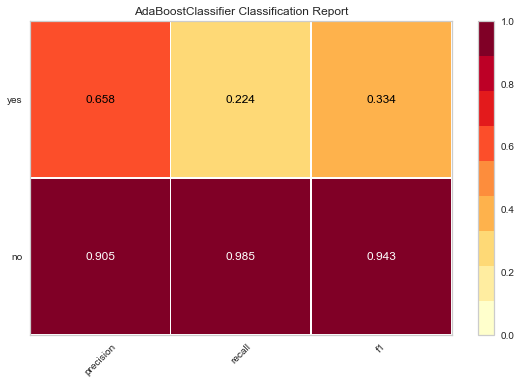

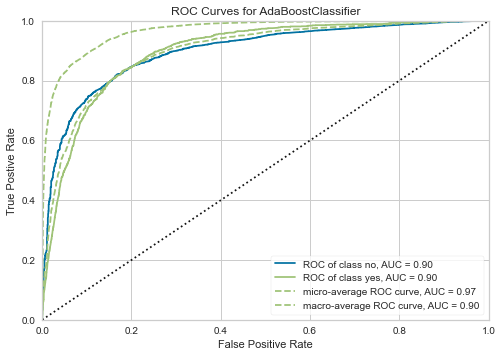

In [52]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(AdaBoostClassifier(n_estimators= 100, learning_rate=0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## 4.3 Bagging Classifier

In [53]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0  Decision Tree  0.899292
0  Random Forest  0.904969
0       Adaboost  0.895311
0        Bagging  0.904084

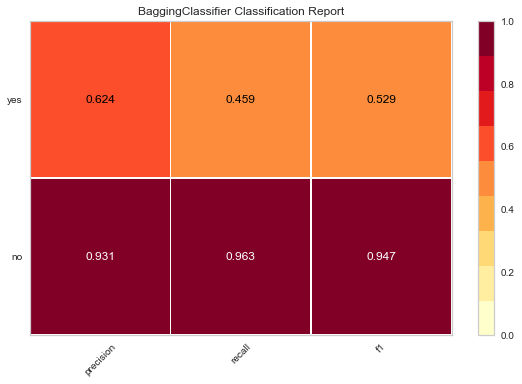

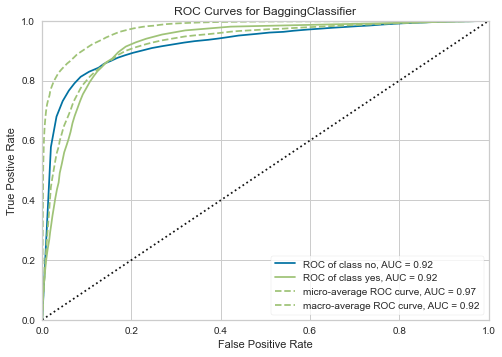

In [54]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

## 4.3 Gradient Boosting Classifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22)
gbcl = gbcl.fit(X_train, y_train)

pred_GB = gbcl.predict(X_test)
acc_GB = accuracy_score(y_test, pred_GB)

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost'], 'accuracy': [acc_GB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0   Decision Tree  0.899292
0   Random Forest  0.904969
0        Adaboost  0.895311
0         Bagging  0.904084
0  Gradient Boost  0.903273

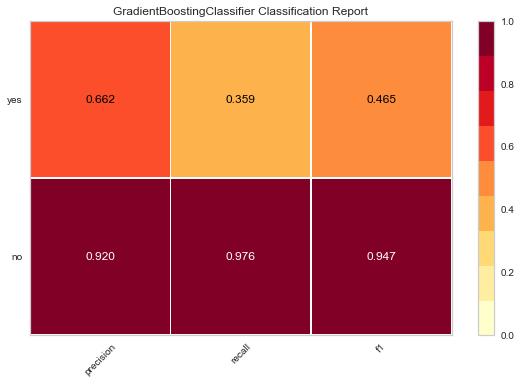

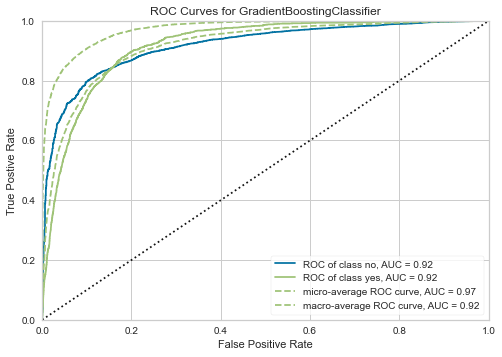

In [56]:
# Visualize model performance with yellowbrick library
viz = ClassificationReport(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(GradientBoostingClassifier(n_estimators = 50, learning_rate = 0.1, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

<br><br>
# 5. Evaluation of the models

## 5.1 Use different data types to evaluate model

We are going to evaluate a bagging classifier model using data with some variables that are transformed by log function. We would like to observe any improvement in the performance of the models.

xtrain shape = (5779, 42), ytrain shape = (2478, 42)


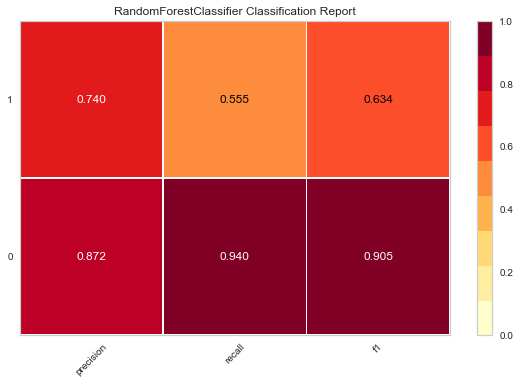

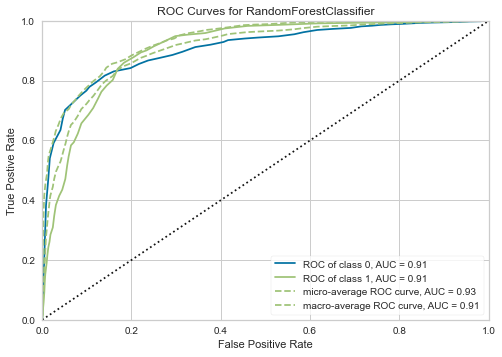

In [61]:
bank_data = pd.read_csv("bank-full.csv") 

features_to_log_transform = ['balance', 'campaign', 'duration', 'pdays', 'previous']
bank_data_log = bank_data.copy(deep=True)

# We remove the data below 0 for log1p transformation
bank_data_log = bank_data_log[(bank_data_log['campaign']>0)] 
bank_data_log = bank_data_log[(bank_data_log['duration']>0) & (bank_data_log['pdays']>0)]

# Transform the data using log function to reduce distance between outliers and in
for feature in features_to_log_transform:
    if bank_data_log[feature].dtype == 'int64': # Look for integer data series
        if np.min(bank_data_log[feature])>0: # Log1p cannot accept value below 0
            #print(feature)
            bank_data_log[feature] = np.log1p(bank_data_log[feature])
            
bank_data_log = pd.get_dummies(bank_data_log, drop_first=True)
bank_data_log["Target"] = bank_data_log["Target_yes"]
bank_data_log = bank_data_log.drop(columns=["Target_yes"])
            
X = bank_data_log.drop(columns=['Target']) # Prepare indepedent variables
y = bank_data_log.pop('Target') # Prepare dependent variable
features = X.columns # The names of the independent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=22) # Create the training set and test set in ration of 70:30
print(f"xtrain shape = {X_train.shape}, ytrain shape = {X_test.shape}")

rfcl = RandomForestClassifier(n_estimators = 50)
rfcl = rfcl.fit(X_train, y_train)

pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)

tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

viz = ClassificationReport(RandomForestClassifier(n_estimators = 50))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(RandomForestClassifier(n_estimators = 50))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

The performance of model with log data is worse than performance of models with raw data.

## 5.2 Transforming categorical data to continuous data
We are going to transform categorical variable to continuous variable and train the model to evaluate the model performance. 

xtrain shape = (31647, 16), ytrain shape = (13564, 16)


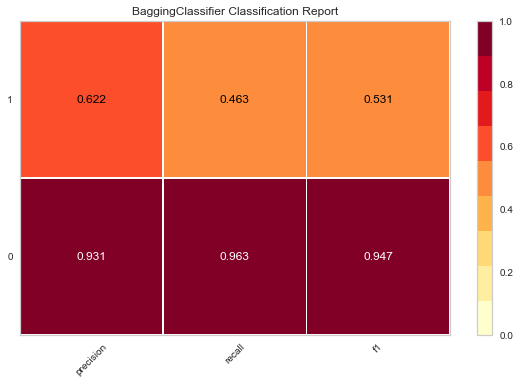

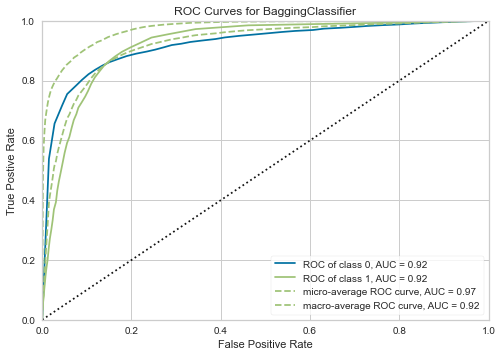

In [60]:
bank_data = pd.read_csv("bank-full.csv") 
bank_data_log_transform = bank_data.copy(deep=True) # Data that is transfored by log function is used for classification training
bank_data_log_transform = bank_data_log_transform.apply(lambda x: d[x.name].fit_transform(x)) # Categorical data is transformed to numerical data

X = bank_data_log_transform.drop(columns=['Target']) # Prepare indepedent variables
y = bank_data_log_transform.pop('Target') # Prepare dependent variable
features = X.columns # The names of the independent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=22) # Create the training set and test set in ration of 70:30
print(f"xtrain shape = {X_train.shape}, ytrain shape = {X_test.shape}")

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)

tempResultsDf = pd.DataFrame({'Method':['Bagging'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

viz = ClassificationReport(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22))
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show() 

There is no significant improvement in performance of Bagging classifier using data with some variables transformed by log function.

Technically, we want to select a model with the best precision number because it is based on true positives divided by the number of true positives plus the number of false positives. In other word, the model with the best precision number has the best hit ratio.

## 5.3 Reflect the overall score of the models

All the ensemble models achieve precision values more than 0.6. Even through Bagging classifier has the best recall number of 0.459, it lacks behind Random Forest classifier in terms of critical precision number. 
<br><br> 
Higher recall number will provide better prediction result that reduces the loss of actual customers from a pool of potential customers. Recall number is based on the  number of correctly predicted term deposit customers divided by the number of term deposit customers that should have been returned.

Since the objective the project is to improve hit rates, we choose Random Forest classifier for its best precision value although it lacks behind Bagging classifier for recall.

## 5.4 Advantages and disadvantages of various algorithms

### 5.4.1 Decision Tree 
Advantages - Decision Tree is the simplest to train <br>
Disvantages - It has the highest potential to overfit. <br>
Conclusion - Don't use decision tree if we want to use the model to identify potential customers for term deposit.
### 5.4.2 Random Forest 
Advantages - Random forest has the best positive precison, except positive recall <br>
Disvantages - The positive recall number is a bit low. <br>
Conclusion - We will choose random forest if we want to use the model with highest hit rate to identify potential customers.
### 5.4.3 Ada Boost classifier 
Advantages - Ada Boost classifier has hight recall number<br>
Disvantages - However, the positive recall value of Ada Boost classifier is very low. <br>
Conclusion - Don't use ada boost classifier if we want to use the model with highest hit rate to identify potential customers.
### 5.4.4 Bagging classifier
Advantages - Bagging classifier has reasonable precision number and recall number <br>
Disvantages - However, the precision number is not the highest. <br>
Conclusion - Use Bagging classifier if we want to use the model with highest positive recall number to identify potential customers.

We are going to use Random Forest for it highest positive precision number.

## 5.5 Compare the performance of ensemble models (Bagging and Boosting) 
The bagging model has the best positive recall value.

# 6. Business Decisions 

In summary, we have selected Random Forest classifier with data transformed by Log function because it has the best precision value for the best hit rate.

However, more details about cost and resources available for campaign are required. It can be used to further fine tune the models for better trade-off of hit rates and missed opportunities to convert potential customers to use term deposit product. 

It is also important to understand life cycle value of customers who are using term deposit product. The life cycle value can be apply to develop better optimization strategy to trade-off recall and precision performance of classifiers.

In [63]:
bank_data['duration_bins'] = pd.cut(bank_data['duration'], bins=10) # To study the data count for range of duration
pd.pivot_table(bank_data, index=['Target'], columns=['duration_bins'], values=['age'], aggfunc='count') # To classify job types against Target results

age                                                  \
duration_bins (-4.918, 491.8] (491.8, 983.6] (983.6, 1475.4] (1475.4, 1967.2]   
Target                                                                          
no                    36702.0         2776.0           348.0             64.0   
yes                    2975.0         1649.0           517.0            112.0   

                                                                  \
duration_bins (1967.2, 2459.0] (2459.0, 2950.8] (2950.8, 3442.6]   
Target                                                             
no                        20.0              4.0              6.0   
yes                       23.0              7.0              5.0   

                                                 
duration_bins (3442.6, 3934.4] (4426.2, 4918.0]  
Target                                           
no                         1.0              1.0  
yes                        1.0              NaN

The table above seems to show a sweet spot for campaign duration between 491.8 to 1475.4 when the successful percentage is higher than other duration periods. It is possible to adjust campaign day to increase hit rates of campaign.